# Notebook Cartão de Crédito

## 02.04 Obtendo a base de dados

In [2]:
import pandas as pd

dataframe = pd.read_csv('data/CC_GENERAL.csv')
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
dataframe.shape

(8950, 18)

In [4]:
dataframe.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## 02.05 Organizando os dados

In [5]:
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [6]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [7]:
dataframe.shape

(8950, 16)

In [8]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [9]:
dataframe['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

Adotaremos como estratégia a substituição desse valor pela mediana dos valores deste atributo de total de pagamentos minimos realizados. Não é um valor exato, e sim um aproximado por assim dizer.

In [10]:
dataframe.fillna(dataframe.median(), inplace=True)

missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


O próximo passo é normalizar nossos dados. Em alguns atributos relacionados à frequência, teremos um limite que varia de 0 a 1, sendo que 0 é 0% de frequência e 1, por sua vez, significa 100%. Para o atributo de balanço, não teremos a mesma organização de mínimo ou máximo, e isso pode fazer com que o algorítimo gere dados pouco satisfatórios para nós.

Para realizar a normalização dos dados todos entre zero e um, utilizaremos o biblioteca *Scikit learn*, importando o Normalizer do pacote ´´´sklearn.preprocessing´´´.

In [11]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## 02.06 Executando o clustering

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(values)

## 03.04 Critérios de validação

Métricas externas: Precisamos ter os labels 
Métricas internas: Independente dos labels

Dentro das métricas internas:

Critério de compactação: que nos relata quão próximos estão os pontos em um mesmo cluster. 

Critério de separação: que indica quão bem separados estão os pontos em clusters diferentes. 


## 03.04 Matemática de Silhouette

**_Coeficiente de Silhouette_**

$\displaystyle s = \frac{\beta - \alpha}{max(\alpha,\ \beta)} $

em que $\alpha$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **mesmo cluster**. Vamos verificar a compactação dos elementos.

$\beta$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **cluster mais próximo**.

## 03.05 Calculando o Silhouette

In [13]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3645055324417282


## 04.04 Matemática do Davies-Bouldin

**_Índice Davies-Bouldin_**

$\displaystyle DB = \frac{1}{k} \sum^{k}_{i=1} max \ R_{ij} \ (i \neq j)$

Em que $R_{ij}$ é dado por

$\displaystyle R_{ij} = \frac{s_i + s_j}{d_{ij}}$

sendo $s$ a similaridade dentro do cluster, isto é, **compactação**.  O $d$ reflete a similaridade entre clusters, a **separação**. Assim temos os dois critérios importantes para uma boa validação



## 04.05 Calculando o Davies-Bouldin

In [14]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0756856623533984


## 05.04 Matemática do Calinski (Parte 1)

Índice de **Calinski-Harabasz** leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também.

$\displaystyle s = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E - k}{k - 1}$ 

$n_E$ é o número de elementos dentro do cluster.

$k$ é o número de clusters.

$B_k$ é a dispersão dos elementos entre clusters, sendo que a letra "B" significa between.

$W_k$ é a dispersão de elementos dentro do cluster. $W_k$ é calculado pela seguinte expressão:

$\displaystyle W_k = \sum_{q=1}^{k} \sum_{x \in C_q} (x - c_q) (x - c_q)^T$

em que $x$ é o valor do atributo e $c_q$ é o valor do centróide deste atributo para o cluster $q$.

$\sum_{x \in C_q} (x - c_q) (x - c_q)^T$ é uma matriz de **variância-covariância**(?)

**Esta explicação do curso está bem ruim. Atualizar quando possível**

## 05.05 Matemática do Calinski (Parte 2)

cálculo da matriz de variância-covariância para cada cluster

soma das matrizes de variância-covariância

cálculo do traço da matriz resultante

## 05.06 Matemática do Calinski (Parte 3)

$\displaystyle B_k = \sum_{q=1}^{k} n_q (c_q - c_E) (c_q - c_E)^T$

$k$ é o número de clusters.

$n_q$ = número de elementos no cluster

$c_q$ = centróide do cluster

$c_E$ = centróide dos elementos 

O índice de Calinski-Harabasz aqui é $s = 47,64$



## 05.07 Calculando o Calinski

In [15]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.800717231778


## 06.04 A validação relativa

In [16]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)

    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)

    return s, dbs, calinski
    

In [17]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088433 3526.440519908274


In [18]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36454411415175675 1.0759640420985466 3431.7970107150363


In [19]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3071851601232154 1.1416743501920918 3018.111035346375


In [20]:
s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.2948980659927138 1.2021063340563658 2395.485319069224


## 06.05 A estrutura dos clusters

In [21]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [22]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03899857201014087 3.5271296697572354 299.15203354217584
0.36454411415175675 1.0759640420985466 3431.7970107150363


## 06.06 A estabilidade dos clusters

In [23]:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3685724000878285 1.0566572283925255 1204.1084172648182
0.3539831746159207 1.1396268152633486 1194.9384641787258
0.36704188760608253 1.098493261377676 1167.5309516804


# 07.04 Gerando gráficos

<function matplotlib.pyplot.show(*args, **kw)>

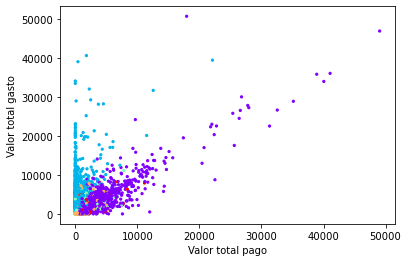

In [24]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show

## 07.05 Interpretação visual

In [25]:
import seaborn as sns

dataframe["cluster"] = labels
# sns.pairplot(dataframe[:], hue="cluster")

Note que este tipo de visualização não nos ajuda muito. Será que existem outras maneiras mais eficientes para lidar com clusters?

## 08.04 Descrevendo os atributos

In [26]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,2


In [27]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1539.0  1144.165942  1664.223404   0.000000   212.743922   
1        1072.0  1794.637544  1983.094646   0.000000   506.925348   
2        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
3        3280.0   443.746756   846.398201   0.000000    23.365333   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         556.359504  1372.605793  19043.138560            1539.0  0.928301   
1        1087.920500  2316.353276  14581.459140            1072.0  0.862113   
2        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
3          82.941478   410.126094   9630.367575            3280.0  0.774389   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       525.257953  18621.013310           1539.0  0.277969   
1        ...       886.834603  21235.065300           1072.0  0.117280   
2        ...      1330.437428   8345.641905           2648.0  0.001800   
3        ...       248.733727   4483.503862           3280.0  0.246806   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.366883  0.0  0.0  0.083333  0.545455  1.0  
1        0.186888  0.0  0.0  0.083333  0.142857  1.0  
2        0.023264  0.0  0.0  0.000000  0.000000  0.6  
3        0.346748  0.0  0.0  0.000000  0.444444  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

## 08.05 Analisando os valores

In [28]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.59990290e-01 2.44962929e-04 4.38233362e-01 2.56924286e-01
  1.81480476e-01 2.60066385e-02 2.04115645e-04 8.89294797e-05
  1.50387194e-04 9.38944316e-06 1.70215413e-04 6.16810848e-03
  6.03607305e-01 4.03177194e-01 8.53744876e-02 7.18179080e-05]
 [2.35507869e-01 2.16632874e-04 6.00147671e-02 3.40794503e-02
  2.59405314e-02 4.00926396e-01 5.27342660e-05 2.05320176e-05
  3.52306197e-05 6.55716110e-05 1.57289816e-03 1.12083151e-03
  5.35429713e-01 5.97138067e-01 1.04580938e-01 2.77429650e-05]
 [5.04555390e-01 2.72393702e-04 6.17615986e-02 3.62274406e-02
  2.55558957e-02 2.52566049e-01 6.73089665e-05 2.56904022e-05
  4.50749768e-05 5.74398439e-05 1.15610113e-03 1.33183581e-03
  7.19191219e-01 1.66169988e-01 1.79290071e-01 5.52929749e-07]
 [6.91003939e-02 2.30735820e-04 1.21488582e-01 4.79706676e-02
  7.36181130e-02 2.44793374e-02 1.72814707e-04 3.36627014e-05
  1.40285541e-04 7.93816793e-06 1.25005935e-04 2.86309441e-03
  9.43533996e-01 1.53766191e-01 5.68572256e-02 7.61261275e-05]
 [3.

## 08.06 Selecionando os atributos

In [30]:
max = len(centroids[0])

for i in range(max):
    print(dataframe.columns.values[i],"\n {:.4f}".format( centroids[:, i].var()))

BALANCE 
 0.0224
BALANCE_FREQUENCY 
 0.0000
PURCHASES 
 0.0196
ONEOFF_PURCHASES 
 0.0076
INSTALLMENTS_PURCHASES 
 0.0036
CASH_ADVANCE 
 0.0226
PURCHASES_FREQUENCY 
 0.0000
ONEOFF_PURCHASES_FREQUENCY 
 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
 0.0000
CASH_ADVANCE_FREQUENCY 
 0.0000
CASH_ADVANCE_TRX 
 0.0000
PURCHASES_TRX 
 0.0000
CREDIT_LIMIT 
 0.0360
PAYMENTS 
 0.0279
MINIMUM_PAYMENTS 
 0.0543
PRC_FULL_PAYMENT 
 0.0000


In [31]:
centroids[:, i].var()

1.0452715055895805e-09

In [32]:
dataframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,3


In [40]:
len(dataframe.columns.values[:-1])

16

In [36]:
len([centroids[:, i].var() for i in range(len(centroids[0]))])

16

construindo um dataframe com duas colunas (variáveis, variância)

In [89]:
teste = pd.DataFrame(
    list(zip(dataframe.columns.values[:-1], [centroids[:, i].var() for i in range(len(centroids[0]))])),
    columns=['variable', 'variance']
)

Ordenando o df com base nos valores de variância

In [91]:
teste.sort_values(['variance'], ascending=False, inplace=True)
teste

,variable,variance
14,MINIMUM_PAYMENTS,5.431931e-02
12,CREDIT_LIMIT,3.597757e-02
13,PAYMENTS,2.790173e-02
5,CASH_ADVANCE,2.259638e-02
0,BALANCE,2.243362e-02
2,PURCHASES,1.964641e-02
3,ONEOFF_PURCHASES,7.647099e-03
4,INSTALLMENTS_PURCHASES,3.569860e-03
11,PURCHASES_TRX,3.417754e-06
10,CASH_ADVANCE_TRX,3.309662e-07


Removendo a variável "MINIMUM_PAYMENTS"

In [93]:
teste = teste.loc[teste['variable'] != 'MINIMUM_PAYMENTS']

Selecionando as 5 variáveis com maiores variância

In [88]:
teste.iloc[:5]

,name,value
12,CREDIT_LIMIT,0.035978
13,PAYMENTS,0.027902
5,CASH_ADVANCE,0.022596
0,BALANCE,0.022434
2,PURCHASES,0.019646
